In [1]:
%load_ext autoreload
%autoreload 2


from util import *
from kmeans import algorithm
from pprint import pprint


In [2]:

problem_file = '../../alg_test_problems_20240429/TEST_K50_1.json'
timelimit = 10


with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
# try:
    # Run algorithm!
solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
# except Exception as e:
#     exception = f'{e}'
pprint(solution)

alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

# checked_solution

Best obj = 4179.08
[['CAR', [12, 26, 23], [12, 26, 23]],
 ['CAR',
  [2, 6, 41, 38, 24, 33, 8, 20, 14, 30],
  [2, 41, 38, 20, 6, 14, 33, 30, 24, 8]],
 ['CAR', [1, 21, 9, 18, 17, 39, 15], [1, 17, 39, 21, 15, 9, 18]],
 ['BIKE', [19], [19]],
 ['CAR',
  [0,
   25,
   7,
   49,
   47,
   29,
   37,
   43,
   13,
   32,
   11,
   5,
   10,
   35,
   36,
   3,
   28,
   46,
   40,
   27,
   42],
  [0,
   10,
   28,
   7,
   27,
   40,
   5,
   13,
   46,
   35,
   25,
   36,
   3,
   49,
   11,
   43,
   37,
   47,
   32,
   29,
   42]],
 ['CAR', [4, 31, 44, 34, 48], [4, 31, 34, 48, 44]],
 ['CAR', [16, 45], [16, 45]],
 ['BIKE', [22], [22]]]
Order 0 is NOT assigned!


/home/jung/anaconda3/envs/ogc2024/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


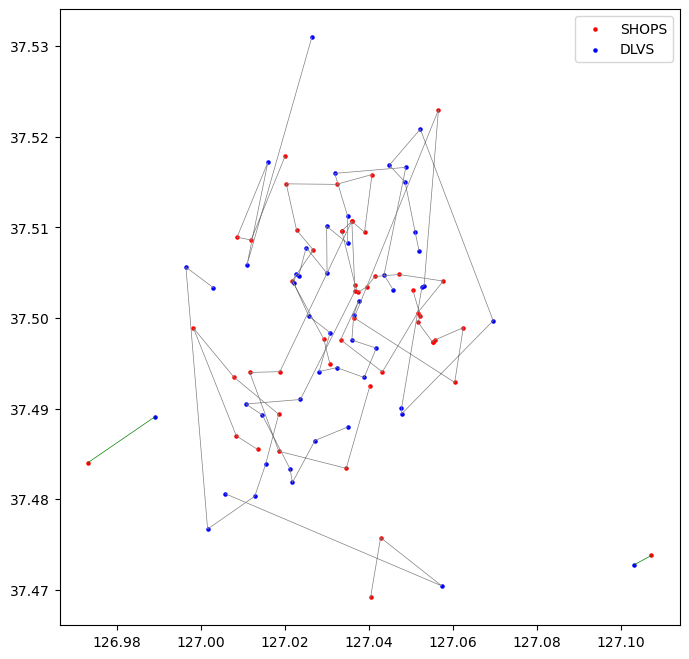

In [3]:
draw_route_solution(ALL_ORDERS, checked_solution)

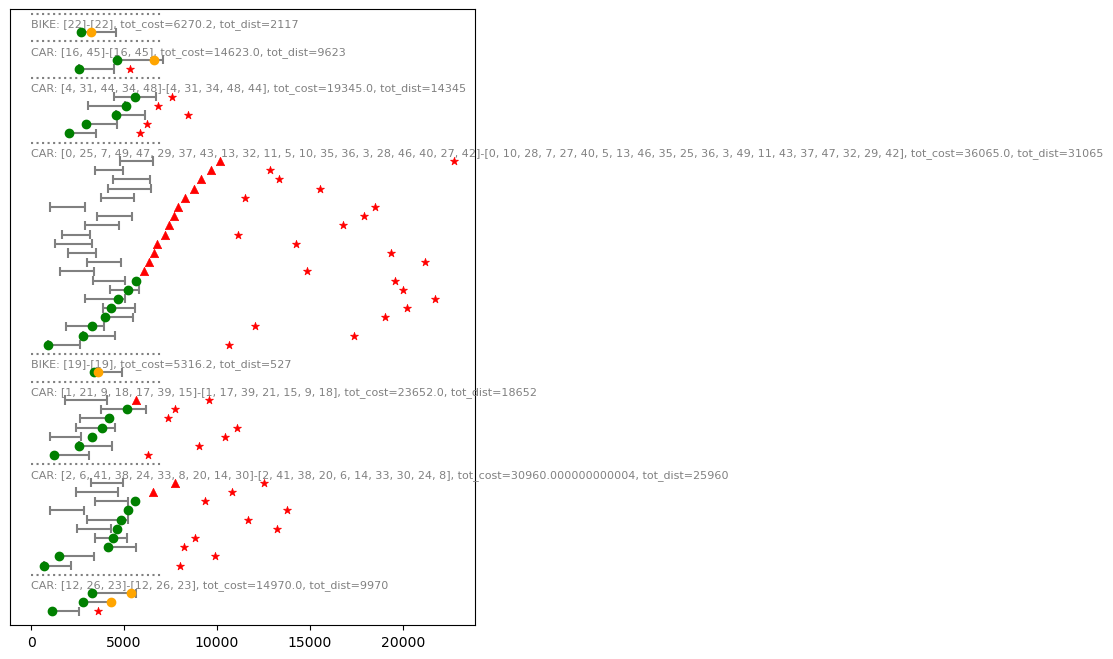

In [4]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)